Dataset collected from https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue which contains images of fresh cotton leaf, fresh cotton plants, diseased cotton leaf and diseased cotton plant.

#### Upload Dataset from Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Required Libraries

In [2]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

####  Save Training & Validation Data Path and Provide Input Image Size

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test'

## Model1 : ResNet152V2 

In [5]:
#using imagenet weights
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234545216/234545216 [==============================] - 1s 0us/step


In [6]:
# not train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
#number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/fresh cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/diseased cotton leaf']

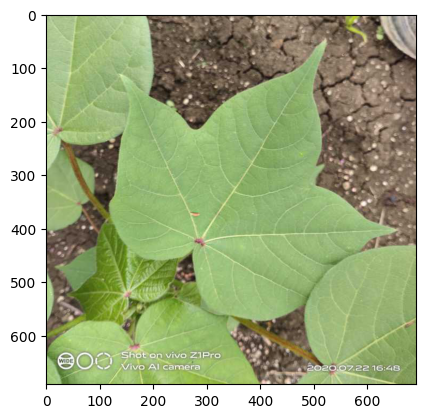

In [9]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/fresh cotton leaf/d (1)_iaip.jpg'
img = plt.imread(img_path)
# Plot the image
plt.imshow(img)
plt.show()


In [10]:
x = Flatten()(resnet152V2.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
model_resnet152v2 = Model(inputs=resnet152V2.input, outputs=prediction)

In [12]:
model_resnet152v2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
model_resnet152v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#### Data Augmentation

In [14]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_r152 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_r152 = ImageDataGenerator(rescale = 1./255)

In [15]:
# same target size as initialied for the image size
training_set_r152 = train_datagen_r152.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [16]:
test_set_r152 = test_datagen_r152.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 175 images belonging to 2 classes.


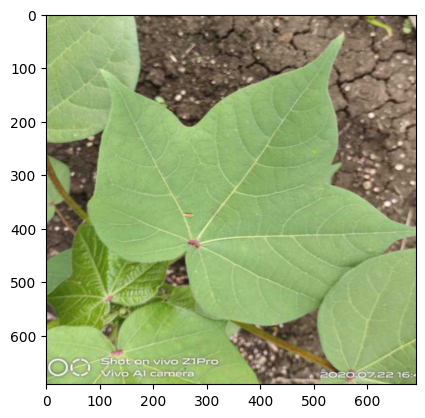

In [17]:
img = plt.imread(img_path)
img = np.expand_dims(img, axis=0)
augmented_img = train_datagen_r152.flow(img)
#show augmented image
plt.imshow(augmented_img[0][0])
plt.show()

In [18]:

r1 = model_resnet152v2.fit_generator(
  training_set_r152,
  validation_data=test_set_r152,
  epochs=15,
  steps_per_epoch=len(training_set_r152),
  validation_steps=len(test_set_r152)
)

<ipython-input-18-886e6209ee35>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1 = model_resnet152v2.fit_generator(


Epoch 1/15
23/23 [==============================] - 173s 7s/step - loss: 1.7088 - accuracy: 0.7874 - val_loss: 0.3466 - val_accuracy: 0.9143
Epoch 2/15
23/23 [==============================] - 18s 761ms/step - loss: 0.3193 - accuracy: 0.9301 - val_loss: 0.1861 - val_accuracy: 0.9771
Epoch 3/15
23/23 [==============================] - 17s 754ms/step - loss: 0.1739 - accuracy: 0.9720 - val_loss: 0.0709 - val_accuracy: 0.9714
Epoch 4/15
23/23 [==============================] - 17s 748ms/step - loss: 0.1024 - accuracy: 0.9776 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 5/15
23/23 [==============================] - 17s 754ms/step - loss: 0.1097 - accuracy: 0.9790 - val_loss: 0.0315 - val_accuracy: 0.9886
Epoch 6/15
23/23 [==============================] - 18s 777ms/step - loss: 0.0622 - accuracy: 0.9860 - val_loss: 0.0549 - val_accuracy: 0.9886
Epoch 7/15
23/23 [==============================] - 17s 753ms/step - loss: 0.0558 - accuracy: 0.9888 - val_loss: 0.0609 - val_accuracy: 0.9771
E

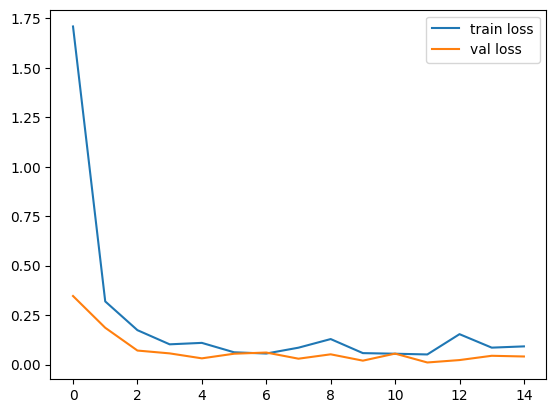

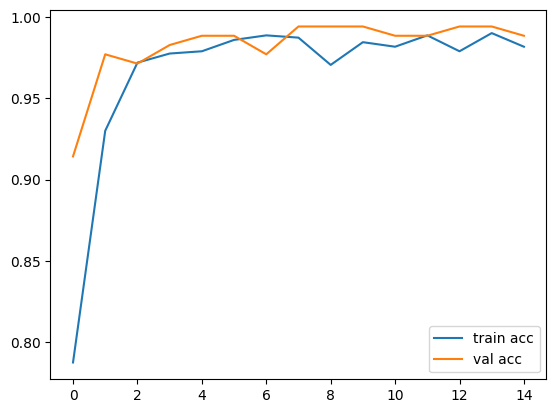

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_resnet152v2')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_resnet152v2')

### Save Model

In [20]:
from tensorflow.keras.models import load_model

model_resnet152v2.save('model_resnet152V2.h5')

In [21]:
y_pred = model_resnet152v2.predict(test_set_r152)

6/6 [==============================] - 6s 595ms/step


In [22]:
y_pred

array([[1.95460943e-12, 1.00000000e+00],
       [1.00000000e+00, 9.18351952e-31],
       [1.00000000e+00, 4.93020957e-10],
       [0.00000000e+00, 1.00000000e+00],
       [3.17758128e-30, 1.00000000e+00],
       [1.00000000e+00, 5.79858759e-22],
       [1.00000000e+00, 7.44600914e-09],
       [2.82261562e-12, 1.00000000e+00],
       [1.00000000e+00, 3.89366881e-23],
       [1.00000000e+00, 0.00000000e+00],
       [2.30324088e-13, 1.00000000e+00],
       [5.62468238e-24, 1.00000000e+00],
       [1.00000000e+00, 7.18053460e-24],
       [4.97815623e-17, 1.00000000e+00],
       [3.41174522e-27, 1.00000000e+00],
       [3.80168983e-22, 1.00000000e+00],
       [1.58286774e-26, 1.00000000e+00],
       [7.16581440e-07, 9.99999285e-01],
       [2.22736940e-19, 1.00000000e+00],
       [6.37483231e-19, 1.00000000e+00],
       [9.99999523e-01, 4.62983394e-07],
       [1.00000000e+00, 5.83603591e-18],
       [1.00000000e+00, 5.32706922e-24],
       [2.19584617e-08, 1.00000000e+00],
       [7.282755

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

## Model2 : Inception V3

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [26]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 2s 0us/step


In [27]:
for layer1 in inception.layers:
    layer1.trainable = False

In [28]:
x1 = Flatten()(inception.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x1)
model_inception = Model(inputs=inception.input, outputs=prediction)

In [30]:
model_inception.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:

train_datagen_inception = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_inception = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set_inception = train_datagen_inception.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [33]:
test_set_inception = test_datagen_inception.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 175 images belonging to 2 classes.


In [34]:
r2 = model_inception.fit_generator(
  training_set_inception,
  validation_data=test_set_inception,
  epochs=15,
  steps_per_epoch=len(training_set_inception),
  validation_steps=len(test_set_inception)
)

<ipython-input-34-ca4171736742>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = model_inception.fit_generator(


Epoch 1/15
23/23 [==============================] - 25s 851ms/step - loss: 1.3343 - accuracy: 0.7734 - val_loss: 0.3086 - val_accuracy: 0.9143
Epoch 2/15
23/23 [==============================] - 16s 706ms/step - loss: 0.3320 - accuracy: 0.9231 - val_loss: 0.4995 - val_accuracy: 0.9029
Epoch 3/15
23/23 [==============================] - 16s 698ms/step - loss: 0.4069 - accuracy: 0.9287 - val_loss: 0.2678 - val_accuracy: 0.9543
Epoch 4/15
23/23 [==============================] - 16s 695ms/step - loss: 0.0997 - accuracy: 0.9734 - val_loss: 0.1809 - val_accuracy: 0.9714
Epoch 5/15
23/23 [==============================] - 16s 701ms/step - loss: 0.1505 - accuracy: 0.9608 - val_loss: 0.2827 - val_accuracy: 0.9257
Epoch 6/15
23/23 [==============================] - 17s 736ms/step - loss: 0.2233 - accuracy: 0.9622 - val_loss: 0.1300 - val_accuracy: 0.9543
Epoch 7/15
23/23 [==============================] - 16s 701ms/step - loss: 0.0762 - accuracy: 0.9762 - val_loss: 0.0481 - val_accuracy: 0.9771

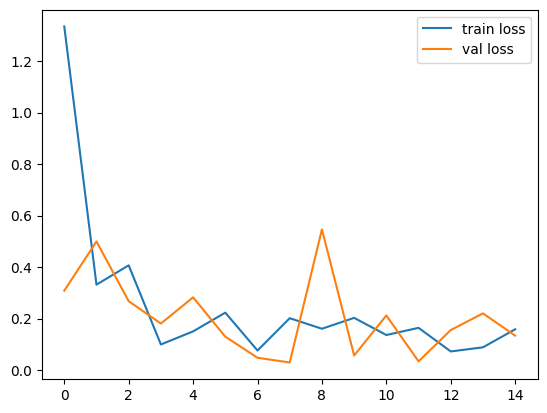

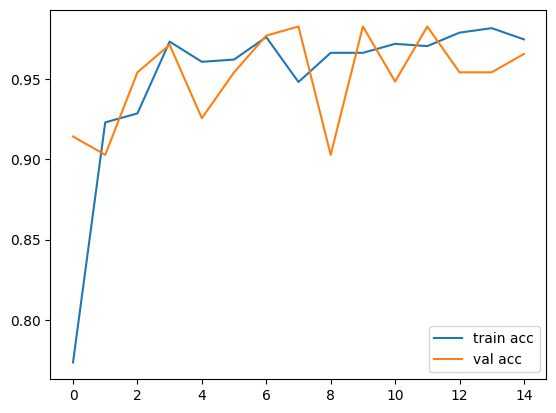

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_inception')

# plot the accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_inception')

In [36]:
model_inception.save('model_inception.h5')

## Model 3 : Resnet50

In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [38]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [39]:
for layer2 in resnet.layers:
    layer2.trainable = False

In [40]:
x2 = Flatten()(resnet.output)

In [41]:
prediction = Dense(len(folders), activation='softmax')(x2)
model_resnet50 = Model(inputs=resnet.input, outputs=prediction)

In [42]:
model_resnet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [43]:
train_datagen_r50 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_r50 = ImageDataGenerator(rescale = 1./255)

In [44]:
training_set_r50 = train_datagen_r50.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [45]:
test_set_r50 = test_datagen_r50.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 175 images belonging to 2 classes.


In [46]:
r3 = model_resnet50.fit_generator(
  training_set_r50,
  validation_data=test_set_r50,
  epochs=15,
  steps_per_epoch=len(training_set_r50),
  validation_steps=len(test_set_r50)
)

<ipython-input-46-160fe08e3e00>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r3 = model_resnet50.fit_generator(


Epoch 1/15
23/23 [==============================] - 23s 770ms/step - loss: 2.8721 - accuracy: 0.5455 - val_loss: 2.5939 - val_accuracy: 0.5600
Epoch 2/15
23/23 [==============================] - 16s 699ms/step - loss: 0.7523 - accuracy: 0.7441 - val_loss: 0.8304 - val_accuracy: 0.6914
Epoch 3/15
23/23 [==============================] - 17s 743ms/step - loss: 0.5438 - accuracy: 0.7678 - val_loss: 0.3369 - val_accuracy: 0.8286
Epoch 4/15
23/23 [==============================] - 17s 742ms/step - loss: 0.3423 - accuracy: 0.8629 - val_loss: 0.2851 - val_accuracy: 0.8800
Epoch 5/15
23/23 [==============================] - 16s 707ms/step - loss: 0.5232 - accuracy: 0.7622 - val_loss: 1.1349 - val_accuracy: 0.6686
Epoch 6/15
23/23 [==============================] - 16s 700ms/step - loss: 0.3449 - accuracy: 0.8448 - val_loss: 0.6776 - val_accuracy: 0.7314
Epoch 7/15
23/23 [==============================] - 16s 704ms/step - loss: 0.3050 - accuracy: 0.8587 - val_loss: 0.3231 - val_accuracy: 0.8057

In [47]:
model_resnet50.save('model_resnet50.h5')